# EDA on 911 Calls

Import the required libraries

In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the csv file as a dataframe 

In [465]:
data = pd.read_csv("911.csv")

Checking the information of the dataset

In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Check the head and tail of dataset

In [467]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [468]:
data.tail(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


## Basic Questions

What are the top 5 zipcodes for 911 calls?

In [469]:
data.groupby("zip").e.sum().sort_values(ascending = False).head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: e, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [470]:
data.groupby("twp").e.sum().sort_values(ascending = False).head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: e, dtype: int64

How many unique title codes are there?

In [471]:
len(data["title"].unique())

110

## Creating new features

Create a new feature called "Reason" that contains only the reason that is present before the column of each tite.

In [472]:
def reason_extractor(some_string):
    return some_string.split(":")[0]

In [473]:
reason = data["title"].apply(lambda x: reason_extractor(x))

In [474]:
data["Reason"] = reason

In [475]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


In [476]:
data.tail(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic


What is the most common Reason for a 911 call based off of this new column?

In [477]:
data["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Create a countplot of 911 calls by Reason.

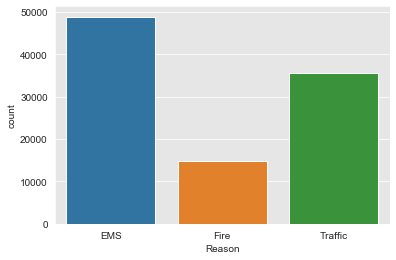

In [478]:
sns.countplot(x="Reason",data=data)

Convert the timeStamp column from strings to DateTime objects.

In [479]:
data["timeStamp"] = pd.to_datetime(data["timeStamp"])

In [480]:
data.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic


Create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column

In [481]:
data["hour"] = data['timeStamp'].apply(lambda time: time.hour)
data["month"] = data['timeStamp'].apply(lambda time: time.month)
data["dayofweek"] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [482]:
data.head((3))

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


In [483]:
data.tail(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic,11,8,2


Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [484]:
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [485]:
data["Day of the week"] =  data["dayofweek"].map(daymap)

Create a countplot of the Day of Week column with the hue based off of the Reason column.

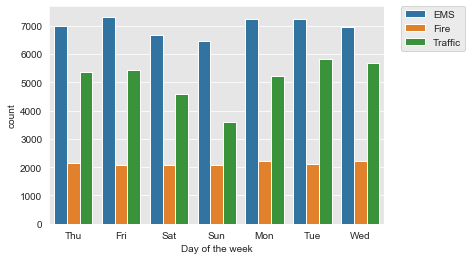

In [486]:
sns.countplot(x="Day of the week",data=data,hue="Reason")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Do the same for Month:

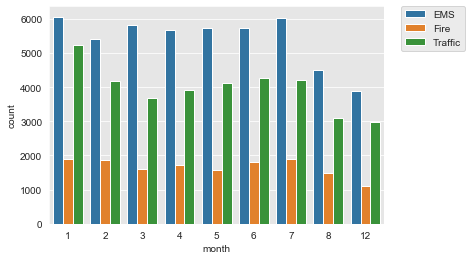

In [487]:
sns.countplot(x="month",data=data,hue="Reason")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

You should have noticed it was missing some Months, create simple line plot that fills in the missing months

Create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.

In [488]:
data_grouped_by_month = data.groupby(data["month"]).count()
data_grouped_by_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek,Day of the week
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


Create a simple plot off of the dataframe indicating the count of calls per month.

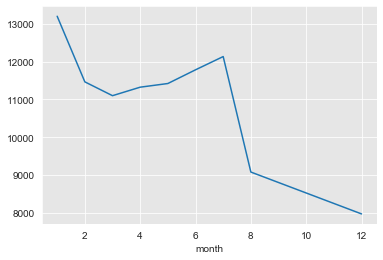

In [489]:
data_grouped_by_month['e'].plot()

Create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.

In [528]:
data_grouped_by_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek,Day of the week
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


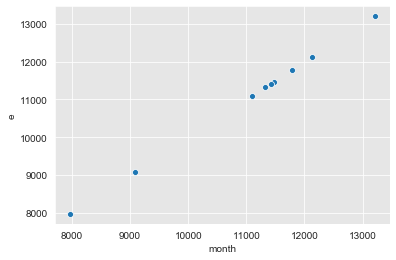

In [529]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.scatterplot(x="month",y="e",data=data_grouped_by_month)

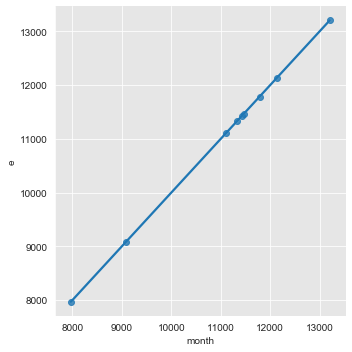

In [494]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lmplot(x="month",y="e",data=data_grouped_by_month)

Create a new column called 'Date' that contains the date from the timeStamp column.

In [495]:
data["Date"] = data["timeStamp"].apply(lambda x:x.date())

In [496]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek,Day of the week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,2015-12-10


Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

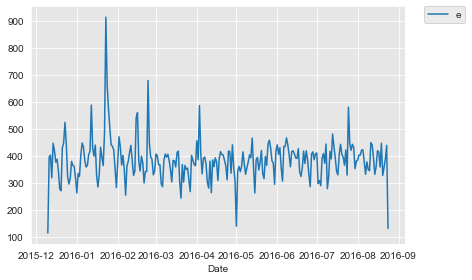

In [497]:
data.groupby("Date").count()["e"].plot()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

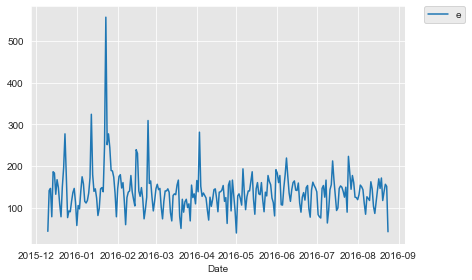

In [498]:
data[data["Reason"]=="Traffic"].groupby("Date").count()["e"].plot()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

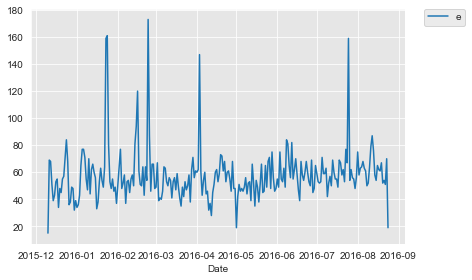

In [499]:
data[data["Reason"]=="Fire"].groupby("Date").count()["e"].plot()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

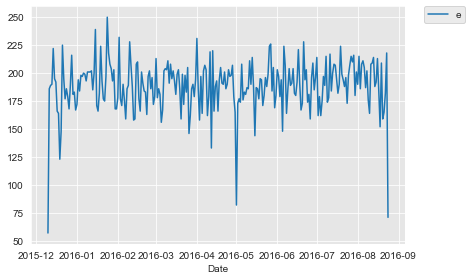

In [500]:
data[data["Reason"]=="EMS"].groupby("Date").count()["e"].plot()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [505]:
grouped_by_day_of_week_and_hour = data.groupby(["Day of the week","hour"]).count()["Reason"].unstack()
grouped_by_day_of_week_and_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Now create a HeatMap using this new DataFrame.

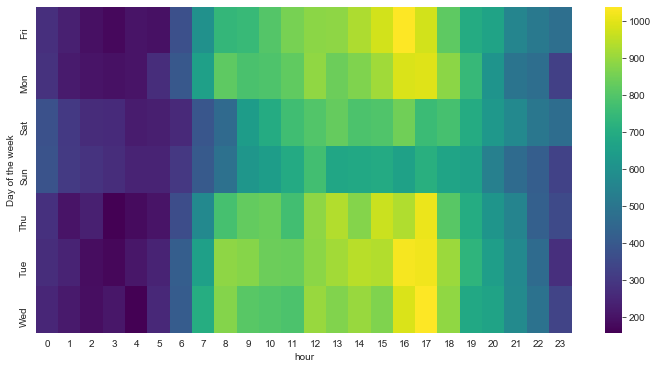

In [508]:
plt.figure(figsize=(12,6))
sns.heatmap(grouped_by_day_of_week_and_hour,cmap='viridis')

Create a clustermap using this DataFrame.

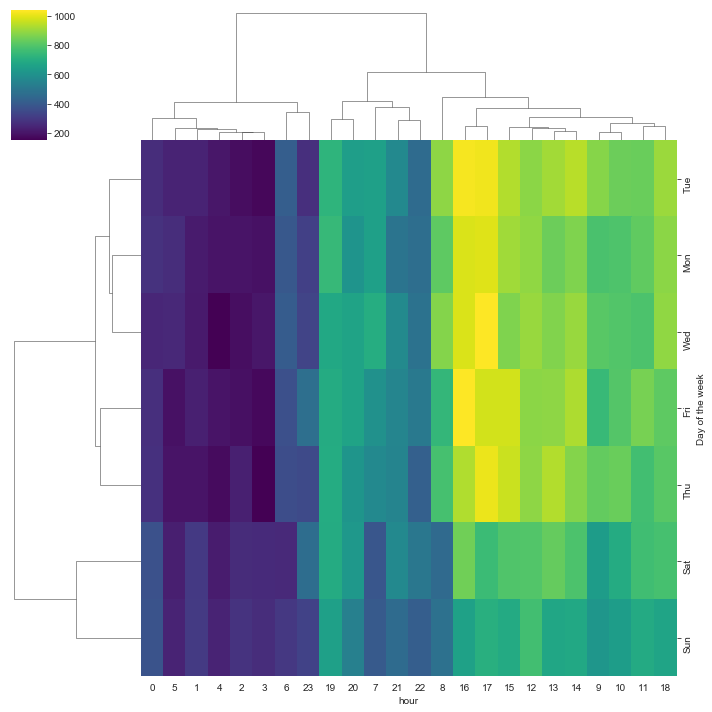

In [511]:
sns.clustermap(grouped_by_day_of_week_and_hour,cmap="viridis")

Repeat these same plots and operations, for a DataFrame that shows the Month as the column.

In [523]:
data_grouped_by_Day_of_week_and_month = data.groupby(["Day of the week","month"]).count()["e"].unstack()
data_grouped_by_Day_of_week_and_month

month,1,2,3,4,5,6,7,8,12
Day of the week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


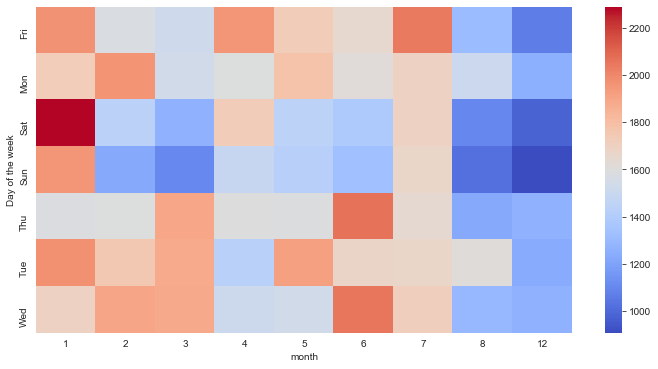

In [525]:
plt.figure(figsize=(12,6))
sns.heatmap(data_grouped_by_Day_of_week_and_month,cmap="coolwarm")

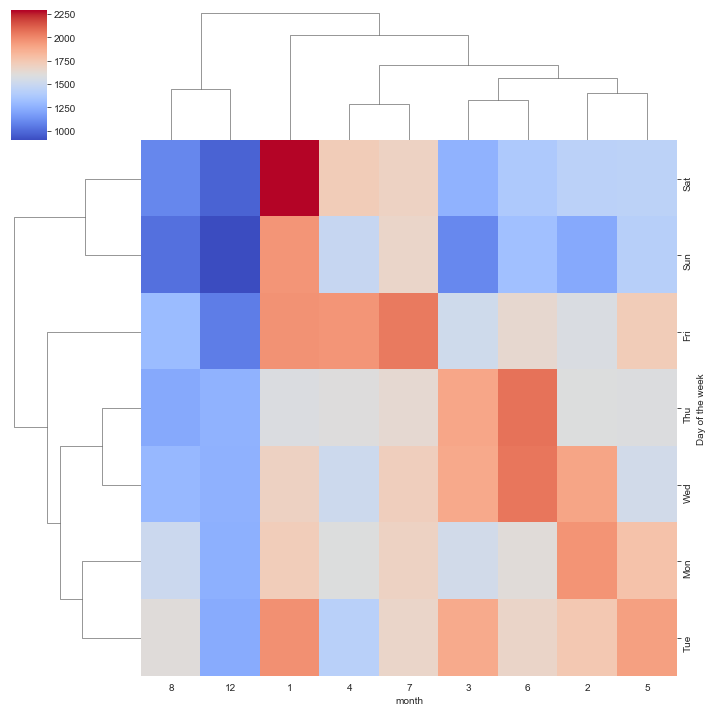

In [526]:
sns.clustermap(data_grouped_by_Day_of_week_and_month,cmap="coolwarm")